Dataset: Fish
https://www.kaggle.com/datasets/aungpyaeap/fish-market?resource=download

My aim is to build linear regression model on training data and evaluate it's match on test data. I coded the qualitative variable using binary variables.

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
%matplotlib inline

In [2]:
# data load
Fish = pd.read_csv("Fish.csv")

In [3]:
# Data recall
Fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
# Statistical description of data
Fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


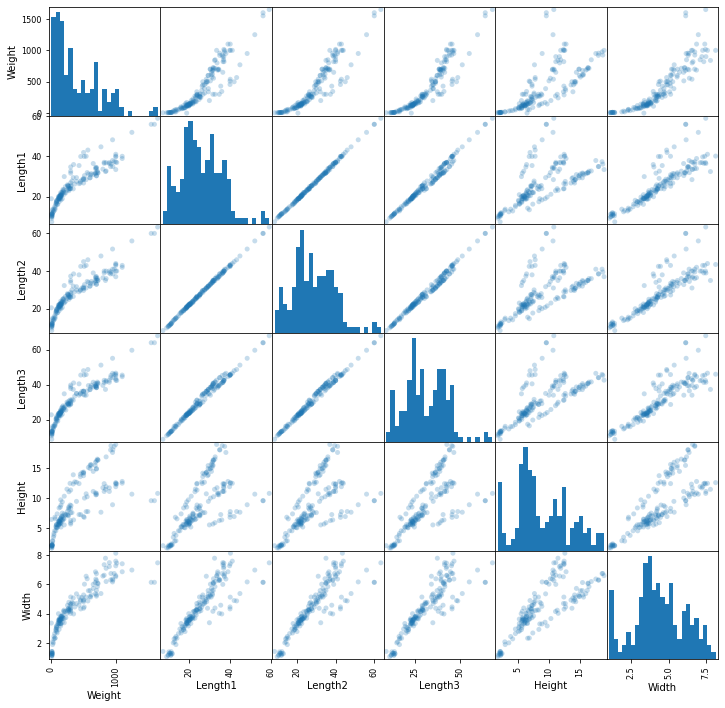

In [5]:
#Plotting matrice of scatter plots
pd.plotting.scatter_matrix(Fish, figsize = (12,12), marker = "o", hist_kwds = {"bins" : 25}, s = 25, alpha = 0.25)
plt.show()

In [6]:
# counting the occurrences of each species
Fish.value_counts("Species")

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
dtype: int64

In [7]:
# Transforming category data into "indicator" data
Fish_dummies = pd.get_dummies(Fish)

In [8]:
# Recalling the original data
Fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [9]:
# Recalling the data with species described binary
Fish_dummies

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [10]:
y = Fish_dummies["Weight"]
X = Fish_dummies.loc[:, "Length1":"Species_Whitefish"]

In [11]:
X.shape

(159, 12)

In [12]:
# Model training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20)

In [13]:
model1 = LinearRegression()

In [14]:
model1.fit(X_train, y_train)

LinearRegression()

In [15]:
model1.score(X_train, y_train)

0.9398604318519485

In [16]:
model1.score(X_test, y_test)

0.9186722363316518

In [ ]:
# Obtained very good results

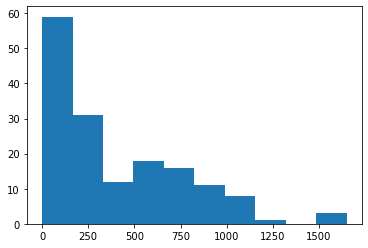

In [17]:
# We check what the histogram of the explained variable "Weight" looks like
plt.hist(Fish_dummies["Weight"])
plt.show()

In [18]:
# We logarithmically transform the "Weight" variable
Fish_dummies_log = Fish_dummies
Fish_dummies_log["Weight"] = np.log1p(Fish_dummies["Weight"])

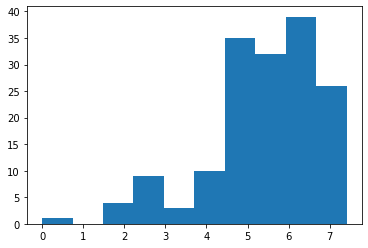

In [19]:
plt.hist(Fish_dummies_log["Weight"])
plt.show()

In [ ]:
# Received histogram are not perfect but better than original

In [20]:
y = Fish_dummies_log["Weight"]
X = Fish_dummies_log.loc[:, "Length1":"Species_Whitefish"]

In [21]:
# We train the model after transforming the "Weight" variable
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20)

In [22]:
model1 = LinearRegression()

In [23]:
model1.fit(X_train, y_train)

LinearRegression()

In [24]:
model1.score(X_train, y_train)

0.8951013910027864

In [25]:
model1.score(X_test, y_test)

0.9561895215524405

In [ ]:
# The result for the training set deteriorated while that for the test set improved

In [26]:
# We define outliers according to IQR
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df < q1 - 1.5*IQR) | (df > q3 + 1.5*IQR))]
    return outliers

In [27]:
outliers_weight = find_outliers_IQR(Fish_dummies_log["Weight"])

In [38]:
# We display outlier results for the explained variable "Weight"
outliers_weight

40     0.000000
72     1.931521
145    2.041220
146    2.140066
147    2.079442
Name: Weight, dtype: float64

In [29]:
Fish_dummies_log.shape

(159, 13)

In [30]:
# We remove outlier results
Fish_dummies_log_without_outliers = Fish_dummies_log.drop([40, 72, 145, 146, 147])

In [31]:
Fish_dummies_log_without_outliers.shape

(154, 13)

In [32]:
y = Fish_dummies_log_without_outliers["Weight"]
X = Fish_dummies_log_without_outliers.loc[:, "Length1":"Species_Whitefish"]

In [33]:
# We train the model without outlier results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20)

In [34]:
model1 = LinearRegression()

In [35]:
model1.fit(X_train, y_train)

LinearRegression()

In [36]:
model1.score(X_train, y_train)

0.9847717730926364

In [37]:
model1.score(X_test, y_test)

0.9785629582982744

In [ ]:
# The results on both the training and test sets improved. I'm satissfied from received results.